# Basic stats

A shoe company launches a premium shoe model SC-X01. The sales for the first month (in USD) are given below:

[54, 69, 50, 57, 70, 69, 52, 46, 60, 42, 57, 64, 58, 60, 40, 63, 60, 70, 57, 71, 66, 67, 68, 42, 46, 50, 48, 65, 45, 45]

Ignoring all other effects (eg: holidays, seasonality, new-ness factor, etc), can you provide an estimate of the average sales the company should expect? 

What is the variability around that average estimate that you are providing?

The marketing manager has heard about the term `confidence interval`. Can you provide that for the estimate and explain what it means to the marketing manager?

In [1]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
# Get the data into a numpy array
sales_1 = np.array([54, 69, 50, 57, 70, 69, 52, 46, 60, 42, 57, 64, 58, 
                    60, 40, 63, 60, 70, 57, 71, 66, 67, 68, 42, 46, 50, 
                    48, 65, 45, 45])

In [4]:
# Find mean of sales_1

np.mean(sales_1)

57.03333333333333

But the above is based on one sample. How do I get an estimate for the population?

**Resampling/Bootstrapping**

In [5]:
# Let's create a bootstrap sample - we will use np.random.choice

?np.random.choice

In [6]:
#create a bootstrap sample from sales_1
sample_1 = np.random.choice(sales_1, 30)

In [7]:
sample_1

array([65, 45, 50, 42, 60, 64, 67, 69, 70, 45, 46, 70, 40, 71, 54, 57, 60,
       57, 60, 54, 50, 57, 69, 63, 42, 40, 46, 71, 58, 50])

In [8]:
#mean of sample_1
np.mean(sample_1)

56.4

In [9]:
# Now, let's write a function that returns mean of n bootstrap samples

def bootstrap_sample_mean(input, num_samples):
    """
      Function that generates bootstrap sample, computes its mean and return the array
      
      Arguments:
         input : the input array for which bootstrap sample has to be generated
         num_samples: num of times the sample has to be generated
         
      output:
         bootstrap_mean : This returns the mean of each of the bootstrap sample as a numpy array
    
    """
    
    bootstrap_mean = np.zeros([num_samples, 1])
    
    for i in np.arange(num_samples):
        sample = np.random.choice(input, input.shape[0])
        bootstrap_mean[i] = np.mean(sample)
        
    return bootstrap_mean

In [10]:
bootstrap_mean = bootstrap_sample_mean(sales_1, 5)

<AxesSubplot:>

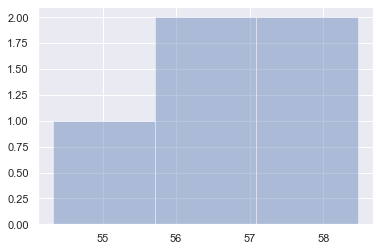

In [11]:
sns.distplot(bootstrap_mean, kde=False)

In [11]:
#What is the variability around this estimate?
# this is referred to as standard error of the estimate

In [12]:
np.std(bootstrap_mean)

1.412546951038757

In [13]:
# Of course, this is small sample. So, generate it for a number of samples (say: 100k). 
# Report the estimate and standard error

In [14]:
# Mean


In [15]:
# Standard Error


In [13]:
# Bonus - this is how the standard error is obtained using scipy

from scipy import stats
stats.sem(sales_1)

1.7885223679161515

### A/B Testing

The shoe company, after a month of sales, got endorsed by the current MVP of NBA. 

The sales for the second month after lunch, and the first month after endorsement is as follows:

[64, 60, 52, 51, 49, 71, 71, 68, 56, 43, 71, 61, 43, 47, 40, 42, 42, 42, 54, 45, 59, 44, 64, 63, 59, 40, 55, 61, 57, 63]

Did the endorsement impact the sales positively? 

In [14]:
# Load 2nd month sales data
sales_2 = np.array([64, 60, 52, 51, 69, 71, 71, 68, 56, 63, 71, 61, 63, 67, 60, 62, 72,
       42, 54, 45, 59, 44, 64, 63, 59, 40, 55, 61, 57, 63])

In [15]:
# find mean of sales_2
np.mean(sales_2)

59.56666666666667

In [16]:
# The difference between the two means:
shoe_sales_diff = np.mean(sales_2) - np.mean(sales_1)
shoe_sales_diff

2.5333333333333385

In [26]:
# So, sales improved, on average, by 2.53 shoes. But is it statistically significant?

This is the approach we are going to take:

- We will assign label to sales before endorsement as 1 and sales after endorsement as 2
- The observed difference is given in the above cell
- We will then randomly shuffle the labels between the two groups 
- Compute the mean between the two groups. 
- Find the % of times when the difference between the means computed is greater than what we observed above
- If the % of times is less than x%, we would make the call that the improvements are real  (generally x is taken as 5)

In [17]:
sales_before = np.array([sales_1, np.repeat(1, sales_1.shape[0])]).T

In [18]:
sales_after = np.array([sales_2, np.repeat(2, sales_2.shape[0])]).T

In [19]:
# Combine them into one ndarray

shoe_sales = np.concatenate((sales_before, sales_after), axis=0)

In [20]:
shoe_sales

array([[54,  1],
       [69,  1],
       [50,  1],
       [57,  1],
       [70,  1],
       [69,  1],
       [52,  1],
       [46,  1],
       [60,  1],
       [42,  1],
       [57,  1],
       [64,  1],
       [58,  1],
       [60,  1],
       [40,  1],
       [63,  1],
       [60,  1],
       [70,  1],
       [57,  1],
       [71,  1],
       [66,  1],
       [67,  1],
       [68,  1],
       [42,  1],
       [46,  1],
       [50,  1],
       [48,  1],
       [65,  1],
       [45,  1],
       [45,  1],
       [64,  2],
       [60,  2],
       [52,  2],
       [51,  2],
       [69,  2],
       [71,  2],
       [71,  2],
       [68,  2],
       [56,  2],
       [63,  2],
       [71,  2],
       [61,  2],
       [63,  2],
       [67,  2],
       [60,  2],
       [62,  2],
       [72,  2],
       [42,  2],
       [54,  2],
       [45,  2],
       [59,  2],
       [44,  2],
       [64,  2],
       [63,  2],
       [59,  2],
       [40,  2],
       [55,  2],
       [61,  2],
       [57,  2

In [21]:
#randomly shuffle labels. We will do this by introducing a new variable experiment_label
experiment_label = np.random.randint(1, 3, shoe_sales.shape[0])

In [22]:
experiment_label

array([2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1])

In [23]:
# create the experiment data combining actual sales with the shuffled label

experiment_data = np.transpose(np.array([shoe_sales[:, 0], experiment_label]))

In [24]:
experiment_data

array([[54,  2],
       [69,  1],
       [50,  2],
       [57,  1],
       [70,  1],
       [69,  1],
       [52,  1],
       [46,  2],
       [60,  1],
       [42,  2],
       [57,  1],
       [64,  1],
       [58,  2],
       [60,  2],
       [40,  1],
       [63,  1],
       [60,  2],
       [70,  1],
       [57,  1],
       [71,  2],
       [66,  1],
       [67,  1],
       [68,  2],
       [42,  1],
       [46,  2],
       [50,  2],
       [48,  2],
       [65,  2],
       [45,  2],
       [45,  1],
       [64,  1],
       [60,  2],
       [52,  2],
       [51,  1],
       [69,  2],
       [71,  1],
       [71,  1],
       [68,  2],
       [56,  1],
       [63,  2],
       [71,  1],
       [61,  1],
       [63,  1],
       [67,  2],
       [60,  2],
       [62,  1],
       [72,  2],
       [42,  1],
       [54,  1],
       [45,  1],
       [59,  1],
       [44,  1],
       [64,  2],
       [63,  2],
       [59,  1],
       [40,  2],
       [55,  2],
       [61,  1],
       [57,  2

In [25]:
# Compute mean between the two groups now.
# Again - take a minute to think what these two groups mean?

experiment_diff_mean =  experiment_data[experiment_data[:,1]==2].mean() \
                        - experiment_data[experiment_data[:,1]==1].mean()

In [26]:
experiment_diff_mean

-0.2104377104377093

In [27]:
# Let's repeat this process many times. Let's write a function to do this

def mean_diff_shuffle_labels(input, num_times):
    """
      Function that shuffles the labels, computes the difference between the groups and return the mean difference array
      
      arguments:
         input: input array that has two columns: the data in the first column and the label in the second column
         num_times: number of times the label 
    
      output:
        mean_diff_shuffle_mean : This returns the mean differene of each of the shuffled sample as a numpy array
        
    """
    
    mean_diff_shuffle_mean = np.zeros([num_times, 1])
    
    for i in np.arange(num_times):
    
        experiment_label = np.random.randint(1, 3, input.shape[0])
        experiment_data = np.transpose(np.array([input[:, 0], experiment_label]))
        experiment_diff_mean =  experiment_data[experiment_data[:,1]==2].mean() \
                        - experiment_data[experiment_data[:,1]==1].mean()
        
        mean_diff_shuffle_mean[i] = experiment_diff_mean
        
    return mean_diff_shuffle_mean
    

In [28]:
shoe_mean_diff_shuffle = mean_diff_shuffle_labels(shoe_sales, 5)

In [102]:
# Let's plot this

<AxesSubplot:>

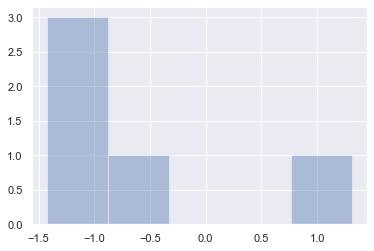

In [29]:
sns.distplot(shoe_mean_diff_shuffle, kde=False)

In [104]:
# find % of times difference of means is greater than observed

In [30]:
#Finding % of times difference of means is greater than observed
print("Data: Difference in mean greater than observed:", \
        shoe_mean_diff_shuffle[shoe_mean_diff_shuffle>shoe_sales_diff])

Data: Difference in mean greater than observed: []


In [31]:
print("Number of times diff in mean greater than observed:", \
            shoe_mean_diff_shuffle[shoe_mean_diff_shuffle>shoe_sales_diff].shape[0])

Number of times diff in mean greater than observed: 0


In [32]:
print("% of times diff in mean greater than observed:", \
        shoe_mean_diff_shuffle[shoe_mean_diff_shuffle>shoe_sales_diff].shape[0]/float(shoe_mean_diff_shuffle.shape[0])*100)

% of times diff in mean greater than observed: 0.0


**What does the above mean?**

**Exercise: Repeat the above for 100,000 runs and report the results**

In [33]:
shoe_mean_diff_shuffle = mean_diff_shuffle_labels(shoe_sales, 100000)

**What do you infer?**

**Effect Size**

Find % increase in sales. Does it make sense?

In [34]:
(np.mean(sales_2) - np.mean(sales_1) )/np.mean(sales_1)*100

4.441846873173592

**Does 4.4% make sense for the business?**

### Confidence interval

Confidence interval is the range of values the measurement metric is going to take.

An example would be: 90% of the times, the increase in average sales (before and after endorsement) would be within the bucket  3.4 and 6.7 (These numbers are illustrative. We will derive those numbers below)

What is the hacker's way of doing it? We will do the following steps:

- From actual sales data, we sample the data with repetition (separately for before and after) - sample size will be the same as the original
- Find the differences between the mean of the two samples.
- Repeat the above two steps, say 100,000 times.
- Sort the differences. For getting 90% interval, take the 5% and 95% number. That range gives you the 90% confidence interval on the mean.

**Does this process sound familiar** ?

In [35]:
# Function to generate mean difference for many bootstrap samples

def mean_diff_bootstrap(before_sales, after_sales, num_times):
    """
      Function that computes the difference between the groups on a bootstrap sample and return the mean difference array
      
      arguments:
         before_sales: sales before the campaign
         after_sales : sales after the campaign
         num_times: number of times to run the bootstrap sample
    
      output:
        mean_diff : This returns the mean differene of each of the bootstrap groups as a numpy array
        
    """
    
    mean_diff = np.zeros([num_times, 1])
    
    for i in np.arange(num_times):
        
        bootstrap_before = np.random.choice(before_sales, before_sales.shape[0])
        bootstrap_after = np.random.choice(after_sales, after_sales.shape[0])
        bootstrap_mean_diff = np.mean(bootstrap_after) - np.mean(bootstrap_before)
        
        mean_diff[i] = bootstrap_mean_diff
    
        
    return mean_diff
    

In [36]:
mean_diff_bootstrap_experiment = mean_diff_bootstrap(sales_2, sales_1, 50)

In [37]:
#Let's plot this

<AxesSubplot:>

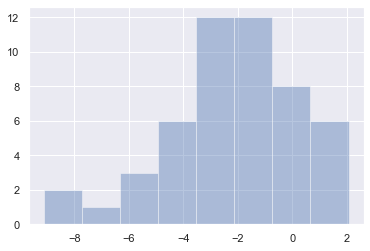

In [38]:
sns.distplot(mean_diff_bootstrap_experiment, kde=False)

In [39]:
mean_diff_bootstrap_experiment_sorted = np.sort(mean_diff_bootstrap_experiment, axis=0)

In [40]:
np.percentile(mean_diff_bootstrap_experiment_sorted, [5, 95])

array([-6.05666667,  1.185     ])

**Run the above for 500k times and report the interval**